# Python Functions & Iterators/Generators — Assignment Solutions


## Theory Questions

### 1) Difference between a function and a method in Python

- **Function:** A block of reusable code defined with `def` or `lambda` and called by name. It can exist at module level.

-**Method**: A function that is **bound to an object** (or its class). It’s defined inside a class and receives the instance (`self`) or the class (`cls`) as the first parameter.

**Example**

Python
  def add(a, b):

     return a + b  # function


  class Counter:

    def increment(self, x):

        return x + 1  # method (bound to instances of Counter)"
  

### 2) Function arguments vs. parameters

- **Parameters** are the variable names in a function **definition**.
"
  "- **Arguments** are the **values** you pass when you **call** the function.

"
  "**Example**
"
  "```python
"
  "def power(base, exp):  # base and exp are parameters
"
  "    return base ** exp
"
  "power(2, 3)  # 2 and 3 are arguments
"
  "```
"
  

### 3) Ways to define and call a function

**Define:**
"
  "- `def` statement
"
  "- `lambda` (anonymous single-expression function)

"
  "**Call:**
"
  "- Positional arguments
"
  "- Keyword arguments
"
  "- Default arguments
"
  "- Variable-length (`*args`, `**kwargs`)

"
  "**Example**
"
  "```python
"
  "def greet(name, greeting="Hello", /, *args, punctuation="!"):
"
  "    return f"{greeting} {name}{punctuation}"
"
  "greet("Asha")
"
  "greet(name="Asha", greeting="Namaste", punctuation=".")
"
  "adder = lambda x, y: x + y
"
  "adder(3, 4)
"
  "```
"
  

### 4) Purpose of the `return` statement

`return` sends a value back to the caller and **exits** the function immediately. Without `return`, a function returns `None` by default.

"
  "**Example**
"
  "```python
"
  "def first_even(nums):
"
  "    for n in nums:
"
  "        if n % 2 == 0:
"
  "            return n
"
  "    return None
"
  "```
"
  

### 5) Iterators vs. iterables

- **Iterable:** An object you can loop over (has `__iter__` that returns an iterator). Examples: lists, strings, dicts.
"
  "- **Iterator:** The **stateful** object produced by `iter(x)` that yields items via `__next__()` and raises `StopIteration` when done.

**Example**

  "python

  "items = [1, 2, 3]       # iterable

  "it = iter(items)        # iterator

  "next(it), next(it), next(it)

  

### 6) Generators and how they are defined

A **generator** is a special kind of iterator defined with **`yield`** in a function body or via a **generator expression** `(expr for x in xs)`.

"
  "**Example**
"
  "```python
"
  "def countdown(n):
"
  "    while n > 0:
"
  "        yield n
"
  "        n -= 1
"
  "
"
  "gen = (x*x for x in range(5))  # generator expression
"
  "```
"
  

### 7) Advantages of generators

- Memory-efficient (lazy evaluation)
"
  "- Potentially faster for streaming/large data
"
  "- Natural way to express pipelines and infinite sequences
"
  "- Maintain internal state between `yield`s without a class
"
  

### 8) Lambda functions and typical use

A **lambda** is an anonymous, single-expression function: `lambda args: expression`. Use for **short, throwaway** functions—e.g., sort keys, quick transforms.

"
  "**Example**
"
  "```python
"
  "pairs = [("a", 3), ("b", 1), ("c", 2)]
"
  "pairs_sorted = sorted(pairs, key=lambda t: t[1])
"
  "```
"
  

### 9) Purpose and usage of `map()`

`map(func, iterable, ...)` applies `func` to each item, returning a lazy map object (an iterator). Convert to list if you need materialized results.

"
  "**Example**
"
  "```python
"
  "nums = [1, 2, 3]
"
  "doubled = list(map(lambda x: x*2, nums))
"
  "```
"
  

### 10) Difference between `map()`, `reduce()`, and `filter()`

- `map(f, xs)`: **transform** each element → same length.
"
  "- `filter(pred, xs)`: **keep** elements where predicate is `True` → length ≤ original.
"
  "- `reduce(f, xs, init?)`: **aggregate** elements into a **single** value by repeatedly combining (from `functools`).

"
  "**Example**
"
  python

  "from functools import reduce

  "nums = [1, 2, 3, 4]

  "mapped  = list(map(lambda x: x*2, nums))         # [2, 4, 6, 8]

  "filtered = list(filter(lambda x: x%2==0, nums))  # [2, 4]
"
  "summed   = reduce(lambda a,b: a+b, nums, 0)      # 10
"
  "```
"
  

### 11) Internal mechanism for sum via `reduce()` on `[47, 11, 42, 13]`

Below image shows the accumulator (`acc`) and current value (`x`) at each step.

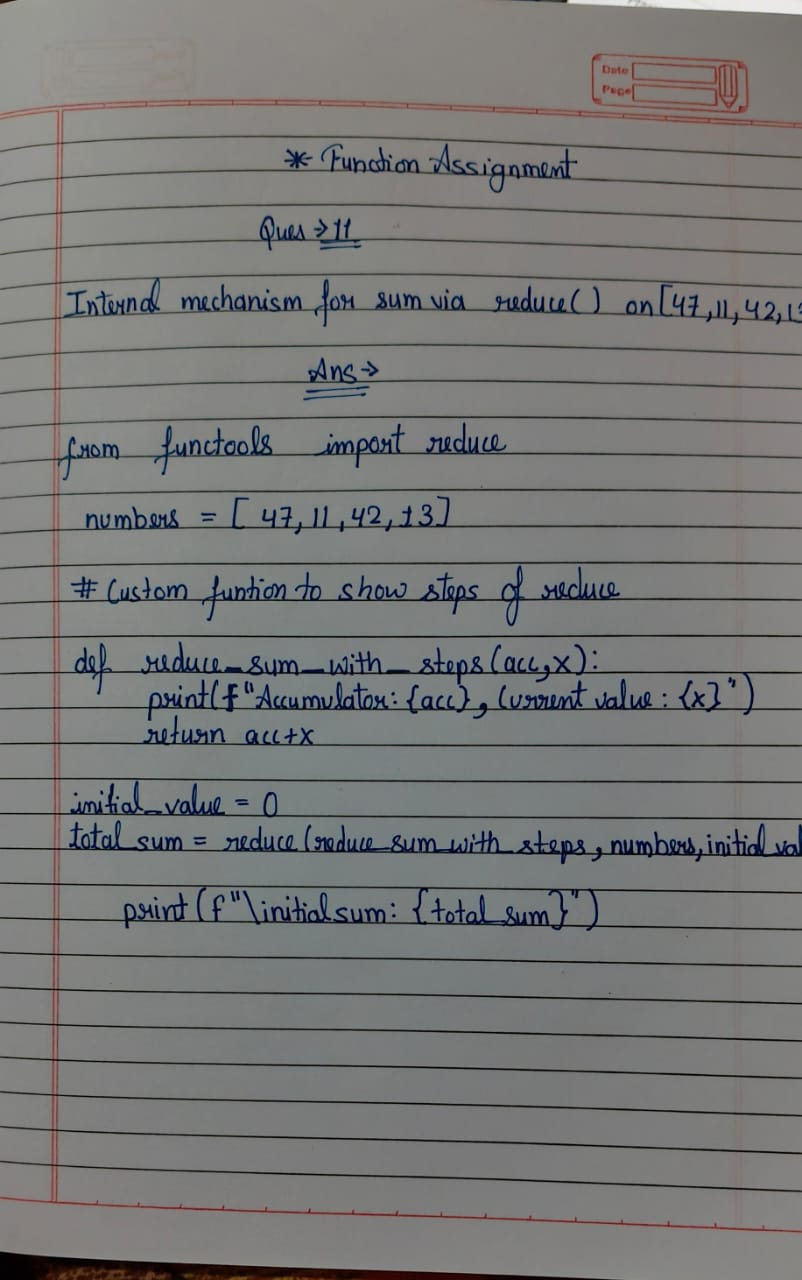  

---

## Practical Questions

### 1) Sum of even numbers in a list

In [29]:
def sum_of_evens(nums):
    return sum(n for n in nums if n % 2 == 0)

# Demo
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
even_sum = sum_of_evens(numbers)
print(f"The sum of even numbers in the list is: {even_sum}")

The sum of even numbers in the list is: 30


### 2) Reverse a string

In [30]:
def reverse_string(s):
    return s[::-1]

# Demo
reverse_string('hello')

'olleh'

### 3) Squares of a list of integers

In [31]:
def squares(nums):
    return [n*n for n in nums]

# Demo
squares([1,2,3,4])

[1, 4, 9, 16]

### 4) Check primes from 1 to 200

In [32]:
def is_prime(n):
    if n < 2:
        return False
    if n % 2 == 0:
        return n == 2
    r = int(n**0.5)
    f = 3
    while f <= r:
        if n % f == 0:
            return False
        f += 2
    return True

primes_1_to_200 = [n for n in range(1,201) if is_prime(n)]
primes_1_to_200[:20], len(primes_1_to_200)

([2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71],
 46)

### 5) Fibonacci iterator class (n terms)

In [33]:
class Fibonacci:
    def __init__(self, n_terms):
        self.n = n_terms
        self.i = 0
        self.a, self.b = 0, 1
    def __iter__(self):
        return self
    def __next__(self):
        if self.i >= self.n:
            raise StopIteration
        if self.i == 0:
            self.i += 1
            return 0
        if self.i == 1:
            self.i += 1
            return 1
        self.a, self.b = self.b, self.a + self.b
        self.i += 1
        return self.b

list(Fibonacci(10))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

### 6) Generator for powers of 2 up to exponent `e` (inclusive)

In [34]:
def powers_of_two(e):
    p = 0
    while p <= e:
        yield 2 ** p
        p += 1

list(powers_of_two(8))

[1, 2, 4, 8, 16, 32, 64, 128, 256]

### 7) Generator that reads a file line by line

In [35]:
def read_lines(path):
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            yield line.rstrip('\n')

# Demo (creates a tiny file and reads it)
demo_path = '/content/demo.txt'
with open(demo_path, 'w', encoding='utf-8') as f:
    f.write('alpha\nbeta\ngamma\n')
list(read_lines(demo_path))

['alpha', 'beta', 'gamma']

### 8) Sort list of tuples by second element using lambda

In [36]:
pairs = [('a', 3), ('b', 1), ('c', 2)]
sorted_pairs = sorted(pairs, key=lambda t: t[1])
sorted_pairs

[('b', 1), ('c', 2), ('a', 3)]

### 9) Use `map()` to convert Celsius to Fahrenheit

In [37]:
def c_to_f(c):
    return (c * 9/5) + 32

celsius = [0, 20, 37, 100]
fahrenheit = list(map(c_to_f, celsius))
fahrenheit

[32.0, 68.0, 98.6, 212.0]

### 10) Use `filter()` to remove vowels from a string

In [38]:
def remove_vowels(s):
    vowels = set('aeiouAEIOU')
    return ''.join(filter(lambda ch: ch not in vowels, s))

remove_vowels('Beautiful Day')

'Btfl Dy'

### 11) Book shop accounting using `lambda` and `map()`

In [39]:
# Assuming each sublist: [order_number, price_per_item, quantity]

# Return: list of (order_number, total_or_total_plus_surcharge)
orders = [
    [1001, 40.95, 1],
    [1002, 56.80, 2],
    [1003, 32.95, 3],
    [1004, 24.99, 1],
]

compute_total = lambda o: (
    o[0],
    round((o[1]*o[2] if o[1]*o[2] >= 100 else o[1]*o[2] + 10), 2)
)

result = list(map(compute_total, orders))
result

[(1001, 50.95), (1002, 113.6), (1003, 108.85), (1004, 34.99)]